<a href="https://colab.research.google.com/github/SChiu-project/reddit-NLP/blob/main/Inspection%26processing_raw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Content

1. check on consol data
  - number of sample: 195
  - missing 8-10 Feb 2023
2. Remove duplicate date
3. Inspect the raw comments
  - features
  - labels
4. map to labels

##1. check on consol data

In [5]:
# import library

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import re
import string
import matplotlib.pyplot as plt

In [ ]:
#check on consol df

consol_df = pd.read_csv("consol_Reddit_WAYMT_Oct22-Jun23.csv")
consol_df

,Unnamed: 0,title,submission_id,comments,post_date
0,0,"What Are Your Moves Tomorrow, June 30, 2023",14metqx,-July 4th on deck\n\n-Historic June rally\n\n-...,NaN
1,1,"What Are Your Moves Tomorrow, June 29, 2023",14ljgfe,That closing green candle was like a 5 trillio...,NaN
2,2,"What Are Your Moves Tomorrow, June 28, 2023",14knrbs,Trades when I 15x: $300 invested\n\nTrades whe...,NaN
3,3,"What Are Your Moves Tomorrow, June 27, 2023",14jriu7,I watched TSLA rise for 3 months. 3 months. 3 ...,NaN
4,4,"What Are Your Moves Tomorrow, June 26, 2023",14ivnrn,I was holding puts over the weekend. Thought f...,NaN
...,...,...,...,...,...
118,118,"What Are Your Moves Tomorrow, July 21, 2022",w3vxb7,airbnb is more expensive than hotels\n\nuber i...,2022-07-21
119,119,"What Are Your Moves Tomorrow, July 25, 2022",w74em8,I got a free share of SIRI when I signed up fo...,2022-07-25
120,120,"What Are Your Moves Tomorrow, July 26, 2022",w7yo3h,Whoever yolo’d 13k contracts of walmart 130 pu...,2022-07-26
121,121,"What Are Your Moves Tomorrow, July 27, 2022",w8tg4j,I have google puts and msft calls 🤡 I had a se...,2022-07-27


##2. Remove duplicate date

In [ ]:
# merge the rows with same date

consol_Reddit_df_unique = consol_df.groupby('date').agg({
    'Comment Body': ' '.join,
    'Comment Length': 'sum'
  }).reset_index()

consol_Reddit_df_unique

,date,comments
0,2022-07-13,This week's [Earnings Thread](https://www.redd...
1,2022-07-14,This week's [Earnings Thread](https://www.redd...
2,2022-07-15,Cashed out up 56k today. Now cuddled up watchi...
3,2022-07-19,This week's [Earnings Thread](https://www.redd...
4,2022-07-20,If 2008 was the Great Recession\n\nThen 2022 i...
5,2022-07-21,airbnb is more expensive than hotels\n\nuber i...
6,2022-07-25,I got a free share of SIRI when I signed up fo...
7,2022-07-26,Whoever yolo’d 13k contracts of walmart 130 pu...
8,2022-07-27,I have google puts and msft calls 🤡 I had a se...
9,2022-07-28,"META ER will be hilarious\n\n""yeah we're tryin..."


In [ ]:
# consistent the datetime format with market data
# convert the date format
consol_Reddit_df_unique['date'] = pd.to_datetime(consol_Reddit_df_unique['date']).dt.strftime('%Y-%m-%d')

In [ ]:
# save a copy of merge the rows with same date

consol_Reddit_df_unique.to_csv("consol_Reddit_df_unique.csv")

##3. Raw data inspection

In [ ]:
# post length distribution vs market index movement

In [ ]:
# new threads in wsb community last 24 hours vs market index movement

In [ ]:
# number of active users left comment distribution vs market index movement

In [3]:
# market data inspection
# load market data

df_SP500 = pd.read_csv("df_SP_1Jul22-30Jun23 (Data).csv")
df_SP500['date'] = pd.to_datetime(df_SP500['date'], format='%Y/%m/%d').dt.strftime('%Y-%m-%d')

df_NQ = pd.read_csv("df_NQ_1Jul22-30Jun23 (Data).csv")
df_NQ['date'] = pd.to_datetime(df_NQ['date'], format='%Y/%m/%d').dt.strftime('%Y-%m-%d')

df_SP500

,date,Open,High,Low,Close,Adj Close,Volume,percent_chnage,Jump,Big_Jump,Drop,Big_Drop
0,2022-07-01,3781.000000,3829.820068,3752.100098,3825.330078,3825.330078,4046950000,1.172443,0,1,0,0
1,2022-07-05,3792.610107,3832.189941,3742.060059,3831.389893,3831.389893,5076590000,1.022509,0,1,0,0
2,2022-07-06,3831.979980,3870.909912,3809.370117,3845.080078,3845.080078,4417720000,0.341862,1,0,0,0
3,2022-07-07,3858.850098,3910.629883,3858.850098,3902.620117,3902.620117,4057770000,1.134276,0,1,0,0
4,2022-07-08,3888.260010,3918.500000,3869.340088,3899.379883,3899.379883,3521620000,0.285986,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
246,2023-06-26,4344.839844,4362.060059,4328.080078,4328.819824,4328.819824,3415030000,-0.368714,0,0,1,0
247,2023-06-27,4337.359863,4384.419922,4335.000000,4378.410156,4378.410156,3573500000,0.946435,1,0,0,0
248,2023-06-28,4367.479980,4390.350098,4360.220215,4376.859863,4376.859863,3739330000,0.214766,1,0,0,0
249,2023-06-29,4374.939941,4398.390137,4371.970215,4396.439941,4396.439941,3696660000,0.491435,1,0,0,0


In [10]:
df_NQ.describe()

,Open,High,Low,Close,Adj Close,Volume,percent_chnage,Jump,Big_Jump,Drop,Big_Drop
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000,251.000000,251.000000,251.000000,251.000000
mean,11714.171805,11822.737192,11616.425836,11728.021340,11728.021340,4.898696e+09,0.121288,0.270916,0.270916,0.270916,0.187251
std,833.916587,826.634417,849.567562,843.213554,843.213554,7.174876e+08,1.283954,0.445321,0.445321,0.445321,0.390892
min,10131.820310,10393.219730,10088.830080,10213.290040,10213.290040,2.184080e+09,-3.922809,0.000000,0.000000,0.000000,0.000000
25%,11048.089845,11201.304685,10979.229980,11121.000000,11121.000000,4.433565e+09,-0.690171,0.000000,0.000000,0.000000,0.000000
50%,11640.370120,11733.799800,11514.740230,11635.309570,11635.309570,4.792140e+09,0.058841,0.000000,0.000000,0.000000,0.000000
75%,12185.360350,12238.369630,12084.544920,12195.135255,12195.135255,5.191510e+09,1.081074,1.000000,1.000000,1.000000,0.000000
max,13859.070310,13864.059570,13716.160160,13787.919920,13787.919920,8.076530e+09,5.105993,1.000000,1.000000,1.000000,1.000000


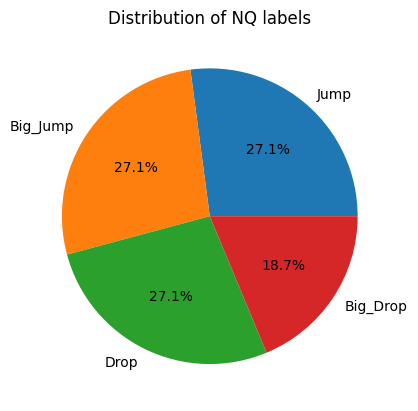

In [8]:
# market data inspection

# NQ distribution

NQ_labels = df_NQ.columns[-4:]

# Calculate the sum of each column
column_sums = df_NQ[NQ_labels].sum()

# Create a pie chart with the column sums as the data
plt.pie(column_sums, labels=NQ_labels, autopct='%1.1f%%')

# Add a title to the pie chart
plt.title('Distribution of NQ labels')

plt.show()  # Display the pie chart

In [11]:
df_SP500.describe()

,Open,High,Low,Close,Adj Close,Volume,percent_chnage,Jump,Big_Jump,Drop,Big_Drop
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000,251.000000,251.000000,251.000000,251.000000
mean,4005.648083,4034.553468,3978.338086,4008.754272,4008.754272,4.238849e+09,0.080315,0.330677,0.175299,0.366534,0.127490
std,179.806328,174.632668,186.538332,182.166402,182.166402,7.831846e+08,1.024761,0.471397,0.380982,0.482820,0.334187
min,3520.370117,3608.340088,3491.580078,3577.030029,3577.030029,1.706460e+09,-3.360063,0.000000,0.000000,0.000000,0.000000
25%,3880.944946,3908.849976,3846.770019,3893.585083,3893.585083,3.825130e+09,-0.512205,0.000000,0.000000,0.000000,0.000000
50%,4000.300049,4028.300049,3969.189941,3998.840088,3998.840088,4.084730e+09,0.025921,0.000000,0.000000,0.000000,0.000000
75%,4128.829834,4148.760009,4107.635010,4135.739991,4135.739991,4.476775e+09,0.751019,1.000000,0.000000,1.000000,0.000000
max,4440.950195,4458.479980,4422.439941,4450.379883,4450.379883,9.354280e+09,4.247843,1.000000,1.000000,1.000000,1.000000


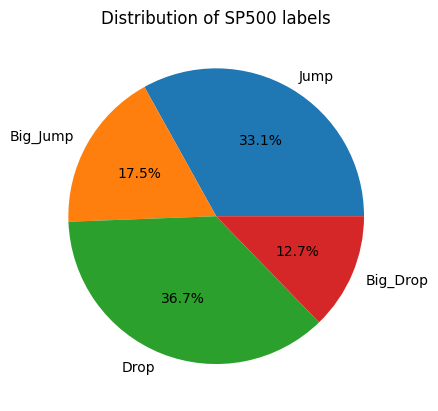

In [12]:
# market data inspection

# SP500 distribution

SP_labels = df_SP500.columns[-4:]

# Calculate the sum of each column
column_sums = df_SP500[SP_labels].sum()

# Create a pie chart with the column sums as the data
plt.pie(column_sums, labels=SP_labels, autopct='%1.1f%%')

# Add a title to the pie chart
plt.title('Distribution of SP500 labels')

plt.show()  # Display the pie chart

##4. map to labels

In [ ]:
# concatenate with SP500

concat_Reddit_SP500_df = pd.merge(consol_Reddit_df_unique, df_SP500, on='date', how='inner')
concat_Reddit_SP500_df

,date,comments,Open,High,Low,Close,Adj Close,Volume,percent_chnage,Jump,Big_Jump,Drop,Big_Drop
0,2022-07-13,This week's [Earnings Thread](https://www.redd...,3779.669922,3829.439941,3759.070068,3801.780029,3801.780029,4109390000,0.584975,1,0,0,0
1,2022-07-14,This week's [Earnings Thread](https://www.redd...,3763.989990,3796.409912,3721.560059,3790.379883,3790.379883,4199690000,0.701115,1,0,0,0
2,2022-07-15,Cashed out up 56k today. Now cuddled up watchi...,3818.000000,3863.620117,3817.179932,3863.159912,3863.159912,4143800000,1.182816,0,1,0,0
3,2022-07-19,This week's [Earnings Thread](https://www.redd...,3860.729980,3939.810059,3860.729980,3936.689941,3936.689941,4041070000,1.967503,0,1,0,0
4,2022-07-20,If 2008 was the Great Recession\n\nThen 2022 i...,3935.320068,3974.129883,3922.030029,3959.899902,3959.899902,4185300000,0.624596,1,0,0,0
5,2022-07-21,airbnb is more expensive than hotels\n\nuber i...,3955.469971,3999.290039,3927.639893,3998.949951,3998.949951,4132790000,1.099237,0,1,0,0
6,2022-07-25,I got a free share of SIRI when I signed up fo...,3965.719971,3975.300049,3943.459961,3966.840088,3966.840088,3568340000,0.028245,1,0,0,0
7,2022-07-26,Whoever yolo’d 13k contracts of walmart 130 pu...,3953.219971,3953.219971,3910.739990,3921.050049,3921.050049,3778950000,-0.813765,0,0,1,0
8,2022-07-27,I have google puts and msft calls 🤡 I had a se...,3951.429932,4039.560059,3951.429932,4023.610107,4023.610107,4112180000,1.826685,0,1,0,0
9,2022-07-28,"META ER will be hilarious\n\n""yeah we're tryin...",4026.129883,4078.949951,3992.969971,4072.429932,4072.429932,4413000000,1.149989,0,1,0,0


In [ ]:
# concatenate with NQ

concat_Reddit_df = pd.merge(concat_Reddit_SP500_df, df_NQ, on='date', how='inner')
concat_Reddit_df

,date,comments,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,percent_chnage_x,Jump_x,...,High_y,Low_y,Close_y,Adj Close_y,Volume_y,percent_chnage_y,Jump_y,Big_Jump_y,Drop_y,Big_Drop_y
0,2022-07-13,This week's [Earnings Thread](https://www.redd...,3779.669922,3829.439941,3759.070068,3801.780029,3801.780029,4109390000,0.584975,1,...,11325.66992,11031.26953,11247.58008,11247.58008,4433060000,1.727757,0,1,0,0
1,2022-07-14,This week's [Earnings Thread](https://www.redd...,3763.989990,3796.409912,3721.560059,3790.379883,3790.379883,4199690000,0.701115,1,...,11279.96973,11005.92969,11251.19043,11251.19043,4481070000,0.896589,1,0,0,0
2,2022-07-15,Cashed out up 56k today. Now cuddled up watchi...,3818.000000,3863.620117,3817.179932,3863.159912,3863.159912,4143800000,1.182816,0,...,11454.69043,11295.33008,11452.41992,11452.41992,4369060000,0.642036,1,0,0,0
3,2022-07-19,This week's [Earnings Thread](https://www.redd...,3860.729980,3939.810059,3860.729980,3936.689941,3936.689941,4041070000,1.967503,0,...,11721.21973,11448.96973,11713.15039,11713.15039,5302740000,1.720802,0,1,0,0
4,2022-07-20,If 2008 was the Great Recession\n\nThen 2022 i...,3935.320068,3974.129883,3922.030029,3959.899902,3959.899902,4185300000,0.624596,1,...,11939.95996,11703.36035,11897.65039,11897.65039,5467080000,1.463067,0,1,0,0
5,2022-07-21,airbnb is more expensive than hotels\n\nuber i...,3955.469971,3999.290039,3927.639893,3998.949951,3998.949951,4132790000,1.099237,0,...,12060.58984,11812.71973,12059.61035,12059.61035,4680930000,1.220901,0,1,0,0
6,2022-07-25,I got a free share of SIRI when I signed up fo...,3965.719971,3975.300049,3943.459961,3966.840088,3966.840088,3568340000,0.028245,1,...,11855.11035,11707.53027,11782.66992,11782.66992,4346520000,-0.467057,0,0,1,0
7,2022-07-26,Whoever yolo’d 13k contracts of walmart 130 pu...,3953.219971,3953.219971,3910.739990,3921.050049,3921.050049,3778950000,-0.813765,0,...,11711.30957,11533.37012,11562.57031,11562.57031,4349760000,-1.187537,0,0,0,1
8,2022-07-27,I have google puts and msft calls 🤡 I had a se...,3951.429932,4039.560059,3951.429932,4023.610107,4023.610107,4112180000,1.826685,0,...,12081.73047,11718.37988,12032.41992,12032.41992,4588480000,2.349651,0,1,0,0
9,2022-07-28,"META ER will be hilarious\n\n""yeah we're tryin...",4026.129883,4078.949951,3992.969971,4072.429932,4072.429932,4413000000,1.149989,0,...,12179.08984,11886.66992,12162.58984,12162.58984,4924950000,1.047726,0,1,0,0


In [ ]:
# save a copy of data set

concat_Reddit_df.to_csv("concat_Reddit_df.csv")